# 描述统计

In [1]:
mean(c(1, 2, 3, 4))

[1] 2.5

In [2]:
median(c(1, 2, 3, 4, 5, 6, 7))    #中位数

[1] 4

绝对中位差：数据点到中位数残差的中位数，$MAD=median(|X_i-median(X)|)$

In [6]:
mad(c(1, 2, 3, 4, 5, 6, 7))

[1] 2.9652

In [5]:
sd(c(1, 2,3, 2,4, 3, 7, 5,3))    #标准差
var(c(1, 2,3, 2,4, 3, 7, 5,3))   #方差

[1] 1.802776

[1] 3.25

求分位数

In [34]:
print(quantile(c(1, 2, 2, 3, 4, 5, 6, 7, 8, 5, 7, 10)))

   0%   25%   50%   75%  100% 
 1.00  2.75  5.00  7.00 10.00 


In [35]:
print(quantile(c(1, 2, 2, 3, 4, 5, 6, 7, 8, 5, 7, 10), c(.25, .75)))

 25%  75% 
2.75 7.00 


In [10]:
print(range(c(1, 2, 3, 4, 5, 6,3, 5, 7)))   #求极差点

[1] 1 7


In [11]:
sum(c(1, 2, 3, 5, 8))

[1] 19

滞后差分，默认为1

In [13]:
print(diff(c(1, 2, 3, 23, 29))) 
print(diff(c(1, 2, 3, 23, 29), lag = 2)) 

[1]  1  1 20  6
[1]  2 21 26


In [14]:
min(c(1, 2, 3, 4))
max(c(1, 2, 3, 4))

[1] 1

[1] 4

归一化scale

In [12]:
x = c(1, 2, 3, 4, 9,5, 6, 7, 8, 4, 5, 6, 3, 5,5)
paste(mean(x), sd(x))

scale_x = scale(x) * 3 + 4  #乘以std加上M
scale_x    #返回每个数的Z分数
paste(mean(scale_x), sd(scale_x))

[1] "4.86666666666667 2.16684980910955"

-1.35339365
0.03110471
1.41560307
2.80010142
9.72259321
4.18459978
5.56909814
6.95359649
8.33809485
2.80010142
4.18459978


[1] "4 3"

计算z分数

In [11]:
x = c(1, 2, 3, 4, 9, 5, 6, 7, 8, 4, 5, 6, 3, 5, 5)
paste(mean(x), sd(x))
(3 - mean(x)) / sd(x)

[1] "4.86666666666667 2.16684980910955"

-1.78446455
-1.32296510
-0.86146564
-0.39996619
1.90753107
0.06153326
0.52303271
0.98453216
1.44603162
-0.39996619
0.06153326


[1] -0.8614656

# 参数统计

## 计算统计效力

In [1]:
install.packages("pwr")

Warning message:
"unable to access index for repository http://www.stats.ox.ac.uk/pub/RWin/bin/windows/contrib/3.5:
  无法打开URL'http://www.stats.ox.ac.uk/pub/RWin/bin/windows/contrib/3.5/PACKAGES'"

package 'pwr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\aa\AppData\Local\Temp\RtmpcLCU6H\downloaded_packages


![](pics/power_fun.png) 

![](pics/effect_size.png) 

### 计算次数

$H_0$：硬币是均匀的(mu=0.5)<br>真实概率为p=0.7，希望以0.8效力能够在0.05水平下正确拒绝原假设的次数<br>alternative = "greater"是因为认为有更大的概率得到正面

In [2]:
library(pwr)
pwr.p.test(h = ES.h(p1 = 0.75, p2 = 0.50), 
           sig.level = 0.05, 
           power = 0.80, 
           alternative = "greater")


     proportion power calculation for binomial distribution (arcsine transformation) 

              h = 0.5235988
              n = 22.55126
      sig.level = 0.05
          power = 0.8
    alternative = greater


如果我们认为我们的硬币在75％的时间内都是正面，那么我们需要将其翻转至少23次，以便有80％的机会正确地拒绝0.05显著性水平下的零假设

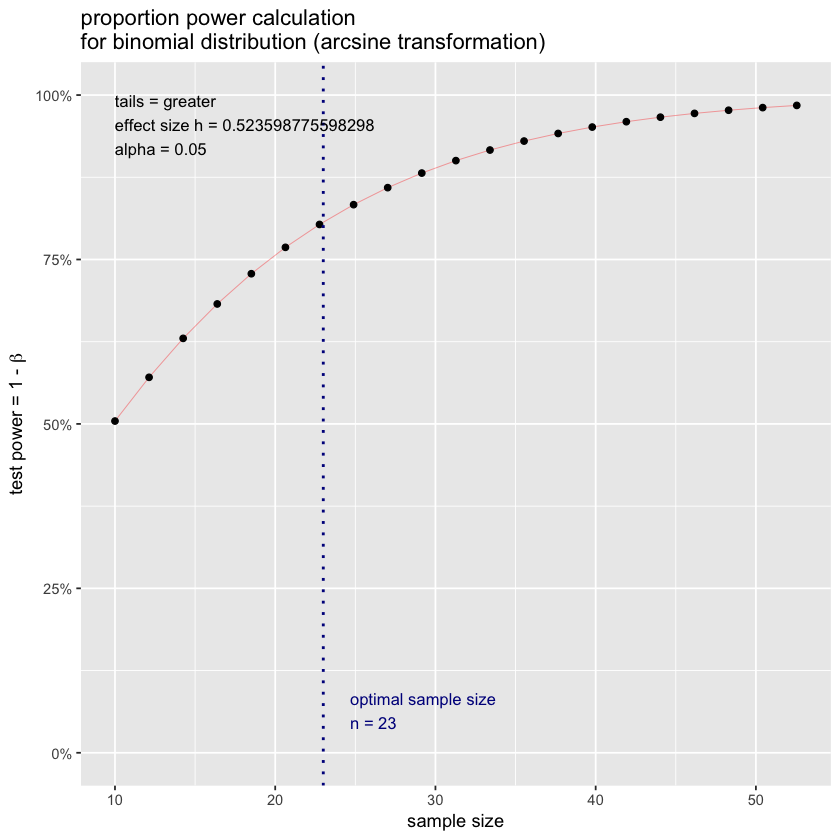

In [9]:
p.out = pwr.p.test(h = ES.h(p1 = 0.75, p2 = 0.50),
                    sig.level = 0.05, 
                    power = 0.80, 
                    alternative = "greater")
plot(p.out)

### 计算效力(power)

In [10]:
pwr.p.test(h = ES.h(p1 = 0.75, p2 = 0.50),
           sig.level = 0.01, 
           n = 40,
           alternative = "greater")


     proportion power calculation for binomial distribution (arcsine transformation) 

              h = 0.5235988
              n = 40
      sig.level = 0.01
          power = 0.8377325
    alternative = greater


In [12]:
pwr.p.test(h = ES.h(p1 = 0.75, p2 = 0.50),
           sig.level = 0.01, 
           n = 40)    #去掉alternative得到更保守的双尾假设


     proportion power calculation for binomial distribution (arcsine transformation) 

              h = 0.5235988
              n = 40
      sig.level = 0.01
          power = 0.7690434
    alternative = two.sided


In [13]:
pwr.p.test(h = ES.h(p1 = 0.65, p2 = 0.50),
           sig.level = 0.05, 
           power = 0.80)


     proportion power calculation for binomial distribution (arcsine transformation) 

              h = 0.3046927
              n = 84.54397
      sig.level = 0.05
          power = 0.8
    alternative = two.sided


+ 单样本t检验或配对样本t检验

In [6]:
pwr.t.test(d=.8,sig.level=0.05,power=.9,type="two.sample",alternative="two.sided")


     Two-sample t test power calculation 

              n = 33.82555
              d = 0.8
      sig.level = 0.05
          power = 0.9
    alternative = two.sided

NOTE: n is number in *each* group


In [ ]:
pwr.t.test(n = , d = , sig.level = , power = , type = c("two.sample", "one.sample", "paired"))

+ 检验各种效应值下的相关性所需的样本量曲线

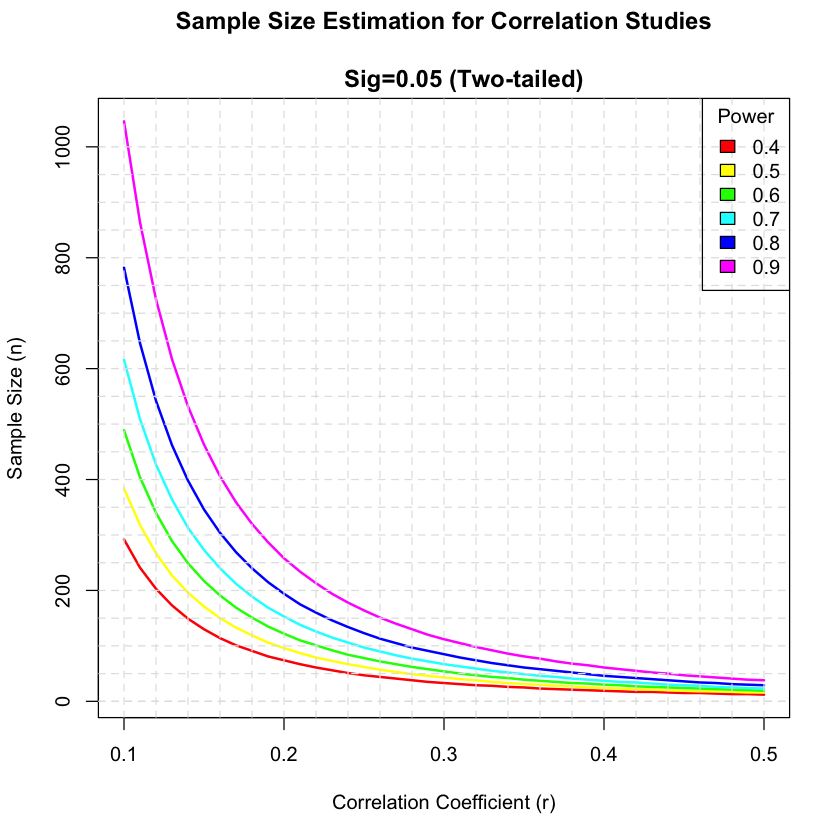

In [15]:
#获取相关系数(r)和功效值(p)
r <- seq(.1,.5,.01)
nr <- length(r)
p <- seq(.4,.9,.1)
np <- length(p)
# 获取样本量大小
samsize <- array(numeric(nr*np), dim=c(nr,np))
for (i in 1:np){
  for (j in 1:nr){
    result <- pwr.r.test(n = NULL, r = r[j],
                         sig.level = .05, power = p[i],
                         alternative = "two.sided")
    samsize[j,i] <- ceiling(result$n)
  }
}
#创建图形
xrange <- range(r)
yrange <- round(range(samsize))
colors <- rainbow(length(p))
plot(xrange, yrange, type="n",
     xlab="Correlation Coefficient (r)",
     ylab="Sample Size (n)" )
#添加功效曲线
for (i in 1:np){
  lines(r, samsize[,i], type="l", lwd=2, col=colors[i])
}
#添加网格线
abline(v=0, h=seq(0,yrange[2],50), lty=2, col="grey89")
abline(h=0, v=seq(xrange[1],xrange[2],.02), lty=2, col="gray89")
#添加注释
title("Sample Size Estimation for Correlation Studies\n
      Sig=0.05 (Two-tailed)")
legend("topright", title="Power", as.character(p),
       fill=colors)

## t检验

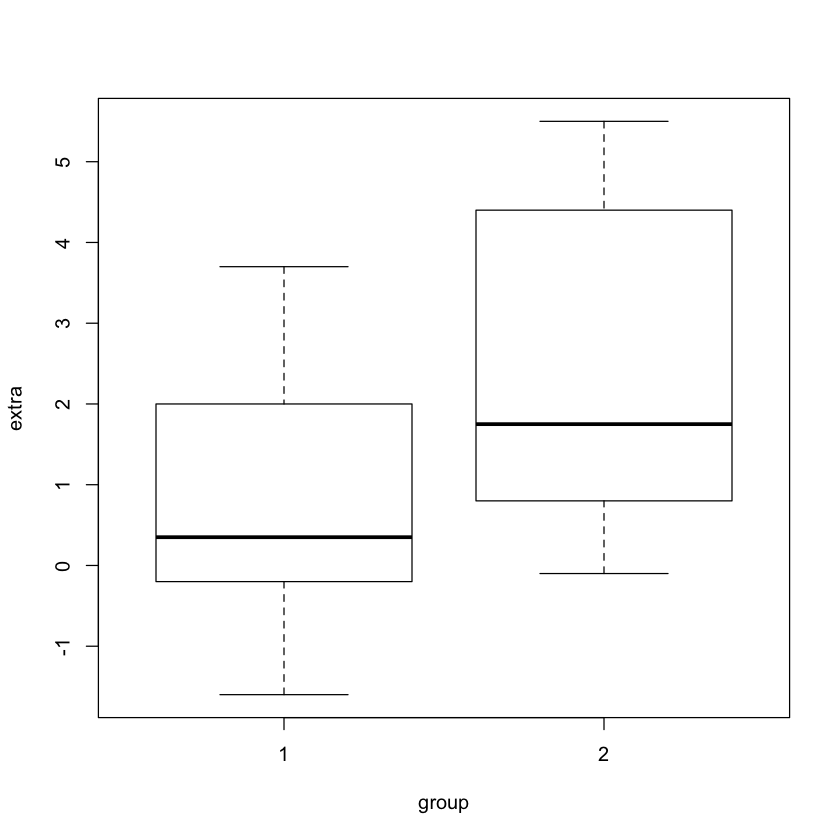

In [15]:
plot(extra ~ group, data = sleep)

### 单样本t检验：推论样本总体的均值$\mu$与理论值$\mu_0$有无差别

$H_0: \mu = \mu_0$为真的条件下服从df=n−1的[t分布](https://zh.wikipedia.org/wiki/%E5%AD%B8%E7%94%9Ft%E6%AA%A2%E9%A9%97)，$t=\frac{M_{来自数据}-\mu_(H_0)}{s_M(由样本计算)}=\frac{\bar{X}-\mu_0}{s/\sqrt{n}}$，df=n-1，$s = \sqrt { \frac { \sum _ { i = 1 } ^ { n } \left( x _ { i } - \overline { x } \right) ^ { 2 } } { n - 1 } }$

t.test(x, y = NULL,
       alternative = c("two.sided", "less", "greater"),
       mu = 0, paired = FALSE, var.equal = FALSE,
       conf.level = 0.95, ...)


In [16]:
sleep[c(1:5, 11:15),]

,extra,group,ID
1,0.7,1,1
2,-1.6,1,2
3,-0.2,1,3
4,-1.2,1,4
5,-0.1,1,5
11,1.9,2,1
12,0.8,2,2
13,1.1,2,3
14,0.1,2,4
15,-0.1,2,5


In [17]:
sleep["extra"][1:5,]

[1]  0.7 -1.6 -0.2 -1.2 -0.1

In [18]:
t.test(sleep["extra"][1:10,], mu=1, conf.level = .99)
t.test(sleep["extra"][1:10,], mu=3, conf.level = .99, alternative = "two.sided")    #默认双侧
t.test(sleep["extra"][1:10,], mu=3, conf.level = .99, alternative = "greater")
t.test(sleep["extra"][1:10,], mu=3, conf.level = .99, alternative = "less")


	One Sample t-test

data:  sleep["extra"][1:10, ]
t = -0.4419, df = 9, p-value = 0.669
alternative hypothesis: true mean is not equal to 1
99 percent confidence interval:
 -1.088544  2.588544
sample estimates:
mean of x 
     0.75 



	One Sample t-test

data:  sleep["extra"][1:10, ]
t = -3.9771, df = 9, p-value = 0.00322
alternative hypothesis: true mean is not equal to 3
99 percent confidence interval:
 -1.088544  2.588544
sample estimates:
mean of x 
     0.75 



	One Sample t-test

data:  sleep["extra"][1:10, ]
t = -3.9771, df = 9, p-value = 0.9984
alternative hypothesis: true mean is greater than 3
99 percent confidence interval:
 -0.8461849        Inf
sample estimates:
mean of x 
     0.75 



	One Sample t-test

data:  sleep["extra"][1:10, ]
t = -3.9771, df = 9, p-value = 0.00161
alternative hypothesis: true mean is less than 3
99 percent confidence interval:
     -Inf 2.346185
sample estimates:
mean of x 
     0.75 


### 独立样本t检验：

#### 样本与方差相等

$H_0:\mu_1 - \mu_2 = \mu_0$为真的条件下服从自由度为2df − 2的t分布，$t = \frac{ \overline { x } _ { 1 } - \overline { x } _ { 2 } - \mu _ { 0 } } { \sqrt { 2 s _ { p } ^ { 2 } / n } },s _ { p } ^ { 2 } = \left( \sum _ { i = 1 } ^ { n } \left( x _ { 1 i } - \overline { x } _ { 1 } \right) ^ { 2 } + \sum _ { i = 1 } ^ { n } \left( x _ { 2 i } - \overline { x } _ { 2 } \right) ^ { 2 } \right) / ( 2 df - 2 )$

In [4]:
t.test(extra ~ group,data = sleep)    #波浪号作用：因变量~自变量
t.test(sleep["extra"][1:10,],sleep["extra"][11:20,], var.equal = TRUE)
t.test(extra ~ group,data = sleep, alternative = "greater")    #均值差大于0，即cond1 > cond2
t.test(extra ~ group,data = sleep, alternative = "less")      #均值超小于0，即cond1 < cond2


	Welch Two Sample t-test

data:  extra by group
t = -1.8608, df = 17.776, p-value = 0.07939
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -3.3654832  0.2054832
sample estimates:
mean in group 1 mean in group 2 
           0.75            2.33 



	Two Sample t-test

data:  sleep["extra"][1:10, ] and sleep["extra"][11:20, ]
t = -1.8608, df = 18, p-value = 0.07919
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -3.363874  0.203874
sample estimates:
mean of x mean of y 
     0.75      2.33 



	Welch Two Sample t-test

data:  extra by group
t = -1.8608, df = 17.776, p-value = 0.9603
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 -3.053381       Inf
sample estimates:
mean in group 1 mean in group 2 
           0.75            2.33 



	Welch Two Sample t-test

data:  extra by group
t = -1.8608, df = 17.776, p-value = 0.0397
alternative hypothesis: true difference in means is less than 0
95 percent confidence interval:
       -Inf -0.1066185
sample estimates:
mean in group 1 mean in group 2 
           0.75            2.33 


计算效应量

In [19]:
sleep.pairt = t.test(extra ~ group,data = sleep) 
sleep.pairt$statistic
sleep.pairt$parameter

t 
-1.860813

df 
17.77647

In [20]:
r_sq = sleep.pairt$statistic ^ 2 / (sleep.pairt$statistic ^ 2 + sleep.pairt$parameter)
r_sq    #效应量

t 
0.1630308

#### 样本不等方差相等

$H_0: \mu_1 - \mu_2 = \mu_0$为真的条件下服从自由度为df1 + df2 − 2的t分布，$t = \frac { \overline { x } _ { 1 } - \overline { x } _ { 2 } - \mu _ { 0 } } { \sqrt { s _ { p } ^ { 2 } / df _ { 1 } + s _ { p } ^ { 2 } / df _ { 2 } } },s _ { p } ^ { 2 } = \left( \sum _ { i = 1 } ^ { n } \left( x _ { 1 i } - \overline { x } _ { 1 } \right) ^ { 2 } + \sum _ { j = 1 } ^ { n } \left( x _ { 2 j } - \overline { x } _ { 2 } \right) ^ { 2 } \right) / \left( df _ { 1 } + df _ { 2 } - 2 \right),i=1,...,df_1,j=1,...,df_2$

In [5]:
t.test(sleep["extra"][1:10,],sleep["extra"][11:19,], var.equal = TRUE) 


	Two Sample t-test

data:  sleep["extra"][1:10, ] and sleep["extra"][11:19, ]
t = -1.6439, df = 17, p-value = 0.1186
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -3.336328  0.414106
sample estimates:
mean of x mean of y 
 0.750000  2.211111 


#### 样本方差皆不相等，常称为Welch检验

$H_0: \mu_1 - \mu_2 = \mu_0$为真的条件下服从自由度为$df = \frac { \left( s _ { 1 } ^ { 2 } / df _ { 1 } + s _ { 2 } ^ { 2 } / df _ { 2 } \right) ^ { 2 } } { \left( s _ { 1 } ^ { 2 } / df _ { 1 } \right) ^ { 2 } / \left( df _ { 1 } - 1 \right) + \left( s _ { 2 } ^ { 2 } / n _ { 2 } \right) ^ { 2 } / \left( n _ { 2 } - 1 \right) }$的t分布，$t = \frac { \overline { x } _ { 1 } - \overline { x } _ { 2 } - \mu _ { 0 } } { \sqrt { s _ { 1 } ^ { 2 } / df _ { 1 } + s _ { 2 } ^ { 2 } / df _ { 2 } } },s _ { 1 } ^ { 2 } = \left( \sum _ { i = 1 } ^ { n } \left( x _ { 1 i } - \overline { x } _ { 1 } \right) ^ { 2 } \right) / \left( df _ { 1 } - 1 \right), s _ { 2 } ^ { 2 } = \left( \sum _ { j = 1 } ^ { df } \left( x _ { 2 j } - \overline { x } _ { 2 } \right) ^ { 2 } \right) / \left( df _ { 2 } - 1 \right), i=1,...,df_1,j=1,...,df_2$

In [16]:
t.test(sleep["extra"][1:10,],sleep["extra"][11:19,], var.equal = FALSE)    #默认0.95显著性，样本与方差均不等，


	Welch Two Sample t-test

data:  sleep["extra"][1:10, ] and sleep["extra"][11:19, ]
t = -1.63, df = 15.903, p-value = 0.1227
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -3.3623119  0.4400897
sample estimates:
mean of x mean of y 
 0.750000  2.211111 


### 配对样本t检验：

$H_0 = \mu=\mu_0$为真的条件下服从自由度为df-1的t分布，$t = \frac { \overline { d } - \mu _ { 0 } } { s _ { d } / \sqrt { n } },s _ { d } = \sqrt { \frac { \sum _ { i = 1 } ^ { n } \left( d _ { i } - \overline { d } \right) ^ { 2 } } { n - 1 } }$，d为配对样本差值平均数

In [2]:
t.test(extra ~ group,data = sleep, paired = TRUE)


	Paired t-test

data:  extra by group
t = -4.0621, df = 9, p-value = 0.002833
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -2.4598858 -0.7001142
sample estimates:
mean of the differences 
                  -1.58 


计算效应量

In [4]:
sleep.pairt = t.test(extra ~ group,data = sleep, paired = TRUE)
sleep.pairt$statistic
sleep.pairt$parameter

In [18]:
r_sq = sleep.pairt$statistic ^ 2 / (sleep.pairt$statistic ^ 2 + sleep.pairt$parameter)
r_sq    #效应量

t 
0.647071

## ANOVA

In [ ]:
install.packages("multcomp")

aov(formula, data = dataframe)，aov(formula, data = NULL, projections = FALSE, qr = TRUE, contrasts = NULL, ...)  
$\bullet$&ensp;&ensp;“~” 为分隔符号，格式为：因变量 ~ 自变量；用A、B预测y：y ~ A + B  
$\bullet$&ensp;&ensp;“+” 为分隔自变量  
$\bullet$&ensp;&ensp;“:” 表示变量交互项；A、B和A×B预测y：y ~ A + B + A : B  
$\bullet$&ensp;&ensp;“\*” 表示所有可能交互项；y ~ A * B * C $\Leftrightarrow$y ~ A + B + C + A : B + A : C + B : C + A : B : C  
$\bullet$&ensp;&ensp;“^” 表示交互项达到某个次数；y ~ (A + B + C) ^ 2 $\Leftrightarrow$y ~ A + B + C + A : B + A : C + B : C  
$\bullet$&ensp;&ensp;“.” 表示包含除因变量外的所有变量；y ~ .$\Leftrightarrow$y ~ A + B + C

In [3]:
head(airquality)

Ozone,Solar.R,Wind,Temp,Month,Day
41,190,7.4,67,5,1
36,118,8.0,72,5,2
12,149,12.6,74,5,3
18,313,11.5,62,5,4
NA,NA,14.3,56,5,5
28,NA,14.9,66,5,6


In [4]:
attach(airquality)    #获取温度与月份数据
temp = transform(Temp, Month = Month) # marginally interesting ...
detach(airquality)
head(temp)

X_data,Month
67,5
72,5
74,5
62,5
56,5
66,5


In [5]:
names(temp) = c("Temp", "Month")

temp$Month = as.factor(temp$Month)    #此处操作是将Month中的数字变为因子，以免ANOVA中df变为1
head(temp)

Temp,Month
67,5
72,5
74,5
62,5
56,5
66,5


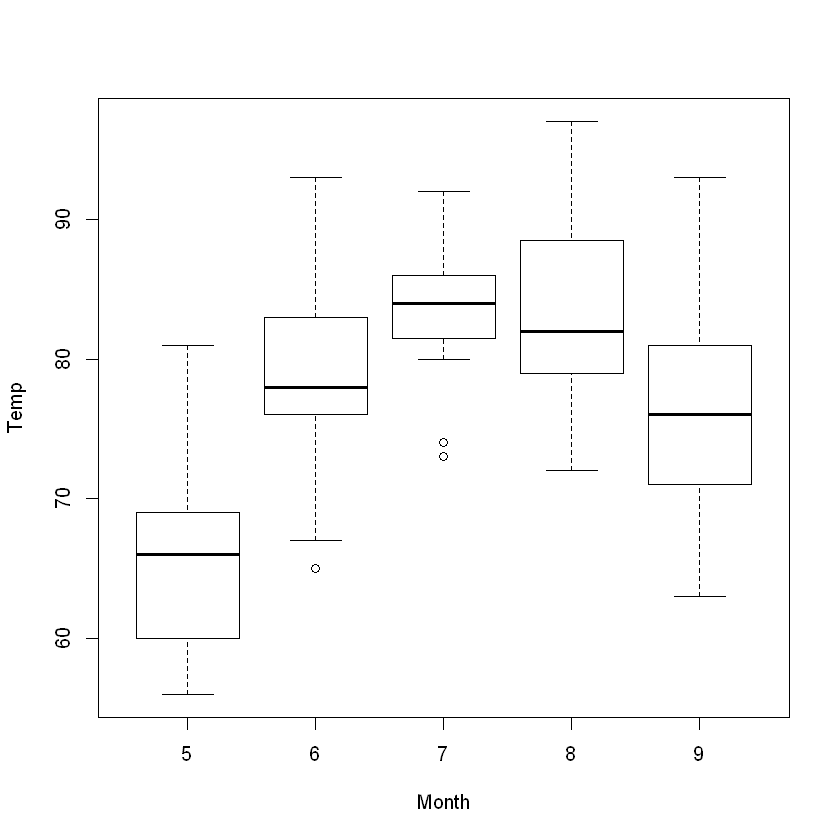

In [3]:
attach(temp)  
plot(Temp ~ Month)
detach(temp)

### 单因素ANOVA：$y\sim A$

#### 方差齐性检验

In [13]:
bartlett.test(Temp ~ Month ,data = temp)     #假定分布正态


	Bartlett test of homogeneity of variances

data:  Temp by Month
Bartlett's K-squared = 12.023, df = 4, p-value = 0.01718


In [14]:
fligner.test(Temp ~ Month ,data = temp)    #不依赖分布假设


	Fligner-Killeen test of homogeneity of variances

data:  Temp by Month
Fligner-Killeen:med chi-squared = 10.28, df = 4, p-value = 0.03596


#### 分组与检验

In [10]:
oneway.test(temp$Temp~factor(temp$Month))


	One-way analysis of means (not assuming equal variances)

data:  temp$Temp and factor(temp$Month)
F = 43.3, num df = 4.00, denom df = 72.62, p-value < 2.2e-16


In [4]:
attach(temp)    #加载数据集
table(Month)    #获取各组样本大小
aggregate(Temp, by=list(Month), FUN=mean)    #各组均值
aggregate(Temp, by=list(Month), FUN=sd)    #各组sd

temp.aov = aov(Temp ~ Month)
summary(temp.aov)
detach(temp)

Month
 5  6  7  8  9 
31 30 31 31 30 

Group.1,x
5,65.54839
6,79.10000
7,83.90323
8,83.96774
9,76.90000


Group.1,x
5,6.854870
6,6.598589
7,4.315513
8,6.585256
9,8.355671


             Df Sum Sq Mean Sq F value Pr(>F)    
Month         4   7061  1765.3   39.85 <2e-16 ***
Residuals   148   6557    44.3                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

#### 事后检验

In [ ]:
DescTools::ScheffeTest(temp.aov, which="site", contrasts=t(cntrMat))

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = Temp ~ Month)

$Month
           diff          lwr       upr     p adj
6-5 13.55161290   8.84386422 18.259362 0.0000000
7-5 18.35483871  13.68583759 23.023840 0.0000000
8-5 18.41935484  13.75035372 23.088356 0.0000000
9-5 11.35161290   6.64386422 16.059362 0.0000000
7-6  4.80322581   0.09547713  9.510974 0.0430674
8-6  4.86774194   0.15999325  9.575491 0.0388654
9-6 -2.20000000  -6.94617992  2.546180 0.7038121
8-7  0.06451613  -4.60448499  4.733517 0.9999995
9-7 -7.00322581 -11.71097449 -2.295477 0.0006215
9-8 -7.06774194 -11.77549062 -2.359993 0.0005376


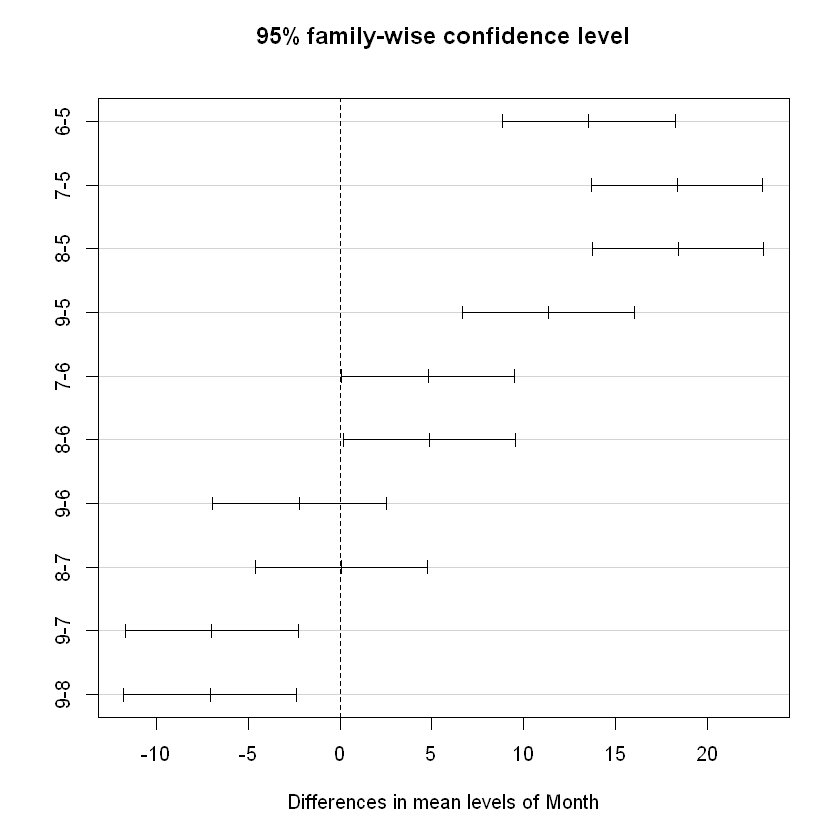

In [5]:
TukeyHSD(temp.aov)
plot(TukeyHSD(temp.aov))

#### 离群点

In [ ]:
library(multcomp)
outlierTest(temp.aov)

#### 残差的正态性检验

In [7]:
Estud <- rstudent(temp.aov)
shapiro.test(Estud)


	Shapiro-Wilk normality test

data:  Estud
W = 0.98228, p-value = 0.04637


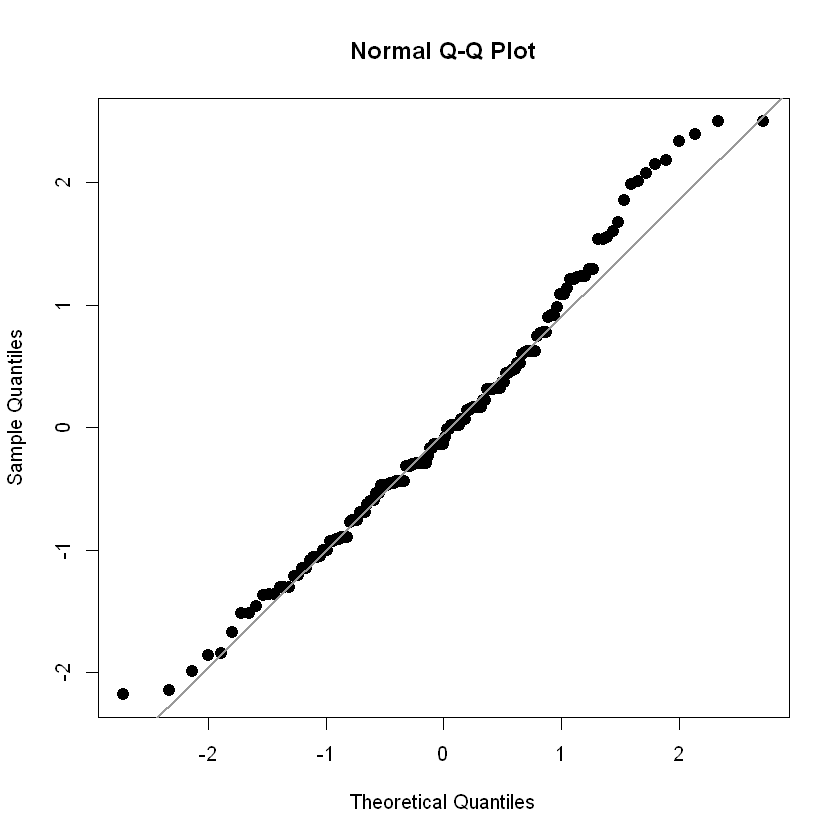

In [8]:
qqnorm(Estud, pch=20, cex=2)
qqline(Estud, col="gray60", lwd=2)

### 单因素协方差分析(Analysis of covariance ,ANCOVA)：$y\sim x+A$，

In [9]:
data(litter,package = "multcomp")
pander(head(litter))

ERROR: Error in pander(head(litter)): 没有"pander"这个函数


### 双因素ANOVA：$y\sim A\ast B$

随机分配60只豚鼠,分别采用两种喂食方法supp(橙汁OJ或维生素VC),各喂食方法中抗坏血酸含量有三种水平dose(0.5mg、1mg或2mg),每种处理方式组合都被分配10只豚鼠,牙齿长度len为因变量

In [10]:
head(ToothGrowth)

len,supp,dose
4.2,VC,0.5
11.5,VC,0.5
7.3,VC,0.5
5.8,VC,0.5
6.4,VC,0.5
10.0,VC,0.5


In [15]:
attach(ToothGrowth)
aggregate(len,by=list(supp,dose),FUN=mean)
aggregate(len,by=list(supp,dose),FUN=sd)
tooth.aov = aov(len ~ supp * dose)
detach(ToothGrowth)
summary(tooth.aov)

Group.1,Group.2,x
OJ,0.5,13.23
VC,0.5,7.98
OJ,1.0,22.70
VC,1.0,16.77
OJ,2.0,26.06
VC,2.0,26.14


Group.1,Group.2,x
OJ,0.5,4.459709
VC,0.5,2.746634
OJ,1.0,3.910953
VC,1.0,2.515309
OJ,2.0,2.655058
VC,2.0,4.797731


            Df Sum Sq Mean Sq F value   Pr(>F)    
supp         1  205.4   205.4  12.317 0.000894 ***
dose         1 2224.3  2224.3 133.415  < 2e-16 ***
supp:dose    1   88.9    88.9   5.333 0.024631 *  
Residuals   56  933.6    16.7                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [ ]:
install.packages("plotly")

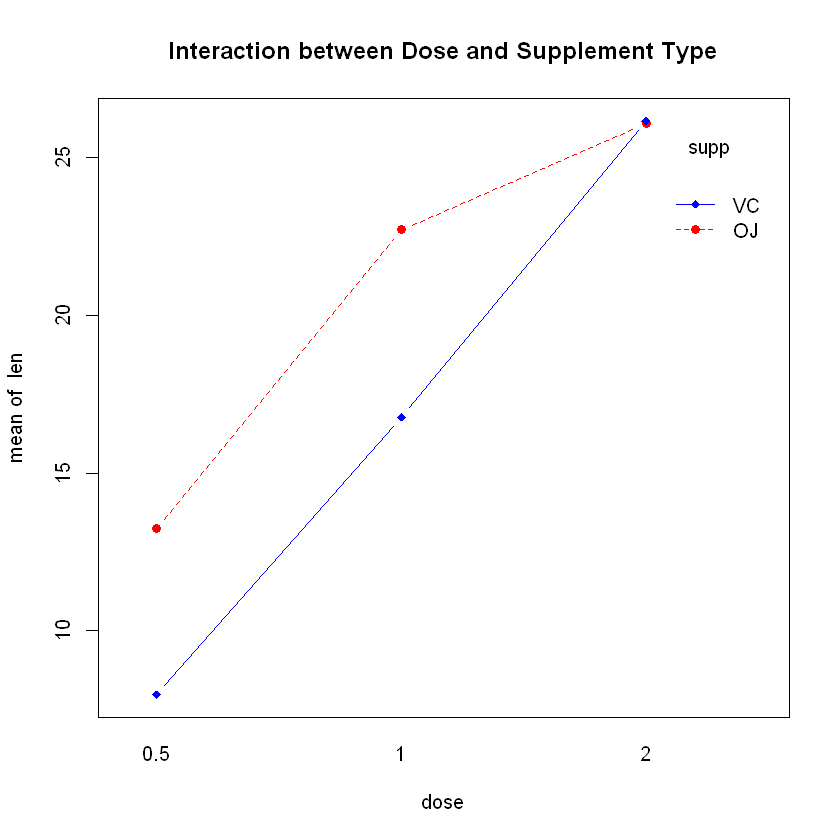

In [19]:
attach(ToothGrowth)
interaction.plot(dose,supp,len,type="b",col=c("red","blue"),pch=c(16,18),main="Interaction between Dose and Supplement Type")
detach(ToothGrowth)

In [ ]:
install.packages("gplots")

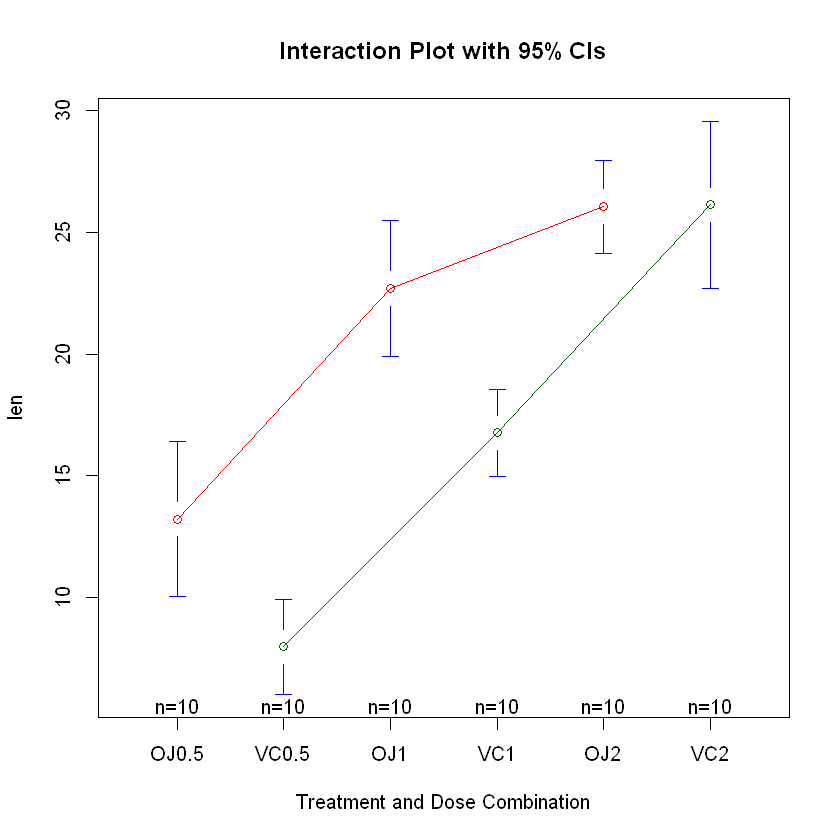

In [25]:
library(gplots)
attach(ToothGrowth)
plotmeans(len~interaction(supp,dose,sep=""),connect=list(c(1,3,5),c(2,4,6)),col=c("red","darkgreen"),main="Interaction Plot with 95% CIs", xlab = "Treatment and Dose Combination")
detach(ToothGrowth)

### 含两个协变量的双因素ANOVA：$y\sim x_1+x_2+A\sim B$

### 随机化区组：$y\sim B+A$，B为区组因素

### 单因素组内ANOVA：$y\sim A+Error(subject/A)$

# 非参数统计

## 卡方检验

In [16]:
X<-c(210, 312, 170, 85, 223)
chisq.test(X)


	Chi-squared test for given probabilities

data:  X
X-squared = 136.49, df = 4, p-value < 2.2e-16


In [30]:
table7_2 <- matrix(c(46, 18, 6, 8), nrow=2, ncol=2)
chisq.test(table7_2)

Warning message in chisq.test(table7_2):
“Chi-squared approximation may be incorrect”


	Pearson's Chi-squared test with Yates' continuity correction

data:  table7_2
X-squared = 3.1448, df = 1, p-value = 0.07617


In [31]:
chisq.test(table7_2)$expected    #自动校正

Warning message in chisq.test(table7_2):
“Chi-squared approximation may be incorrect”

42.66667,9.333333
21.33333,4.666667


In [41]:
# Load the library.
library("MASS")
head(Cars93)

# Create a table with the needed variables.
car.data = table(Cars93$AirBags, Cars93$Type) 
head(car.data)

# Perform the Chi-Square test.
chisq.test(car.data, correct = TRUE)

Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,⋯,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,⋯,5,177,102,68,37,26.5,11,2705,non-USA,Acura Integra
Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,⋯,5,195,115,71,38,30.0,15,3560,non-USA,Acura Legend
Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,⋯,5,180,102,67,37,28.0,14,3375,non-USA,Audi 90
Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,Front,⋯,6,193,106,70,37,31.0,17,3405,non-USA,Audi 100
BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,⋯,4,186,109,69,39,27.0,13,3640,non-USA,BMW 535i
Buick,Century,Midsize,14.2,15.7,17.3,22,31,Driver only,Front,⋯,6,189,105,69,41,28.0,16,2880,USA,Buick Century


                    
                     Compact Large Midsize Small Sporty Van
  Driver & Passenger       2     4       7     0      3   0
  Driver only              9     7      11     5      8   3
  None                     5     0       4    16      3   6

Warning message in chisq.test(car.data, correct = TRUE):
“Chi-squared approximation may be incorrect”


	Pearson's Chi-squared test

data:  car.data
X-squared = 33.001, df = 10, p-value = 0.0002723


- 绘图

In [23]:
# 产生服从卡方分布的观测数为1000的样本
df_n <- seq(1, 5)
chisq_data <- function(n){
  x <- seq(-0.2, 16, length=300)
  prob <- dchisq(x, df=n[1, 1])
  return(data.frame(x=x, prob=prob, df=n[1,1]))
}
require(plyr, quietly=TRUE)
require(ggplot2, quietly=TRUE)
data <- ddply(data.frame(n=df_n), .(n), chisq_data)

head(data)
tail(data)

n,x,prob,df
1,-0.20000000,0.000000,1
1,-0.14581940,0.000000,1
1,-0.09163880,0.000000,1
1,-0.03745819,0.000000,1
1,0.01672241,3.059352,1
1,0.07090301,1.446043,1


,n,x,prob,df
1495,5,15.72910,0.003186504,5
1496,5,15.78328,0.003117378,5
1497,5,15.83746,0.003049697,5
1498,5,15.89164,0.002983433,5
1499,5,15.94582,0.002918558,5
1500,5,16.00000,0.002855045,5


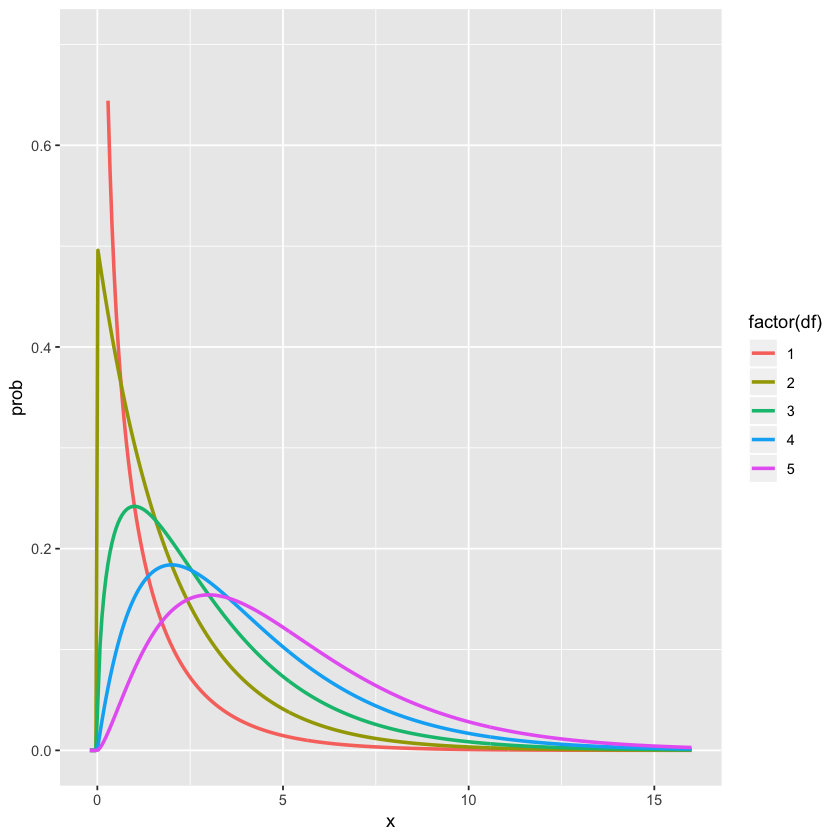

In [22]:
ggplot(data, aes(x=x, y=prob, color=factor(df),group=df)) + 
geom_line(lwd=1) + scale_y_continuous(limits=c(0, 0.7))

# 回归

In [7]:
x <- runif(100)
y <- 1 - 2*x + .3*exp(rnorm(100)-1)    #加入噪声
r <- lm(y~x)
r


Call:
lm(formula = y ~ x)

Coefficients:
(Intercept)            x  
      1.143       -1.894  


In [10]:
lsfit(x, y)    #简单线性拟合
#residuals 为样本点残差

$coefficients
Intercept         X 
 1.142702 -1.894097 

$residuals
  [1] -0.059864997 -0.008741259  0.203785577  0.440006924 -0.136781228
  [6]  0.312091309 -0.111621788 -0.126226756 -0.003589663  0.077213116
 [11] -0.090224915 -0.213639342  0.075532772 -0.027729191 -0.107502798
 [16] -0.140285557 -0.213321396 -0.042230427 -0.106670817  0.010336458
 [21] -0.151481592 -0.029242016  0.100794593 -0.163813972  0.480134647
 [26] -0.152998761 -0.166617139  0.010468118 -0.117640601 -0.121944267
 [31]  0.509583621  0.033671813 -0.144199747  0.140334116 -0.144283602
 [36] -0.125527903 -0.096122643  0.329203972  0.223539941 -0.200443594
 [41] -0.113800574  0.053995334  0.225629918 -0.161171164 -0.116857189
 [46]  0.062256478  0.460196039  0.321435286 -0.040127274 -0.119516128
 [51] -0.008985008 -0.104060349  0.022796121 -0.098097119  0.038524854
 [56] -0.202706835 -0.112054662 -0.021920818 -0.036573016 -0.135701143
 [61] -0.162578180  0.006802701 -0.131649324 -0.174311229 -0.110831546
 [66] -0.

### 1.1.3高级操作

In [4]:
lm(y~x) -> xy
summary(xy)


Call:
lm(formula = y ~ x)

Residuals:
       1        2        3        4        5        6 
-0.18310 -0.02817  0.12676  0.28169 -0.25352  0.05634 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.33803    0.16665   20.03 3.67e-05 ***
x            1.84507    0.03227   57.17 5.60e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.222 on 4 degrees of freedom
Multiple R-squared:  0.9988,	Adjusted R-squared:  0.9985 
F-statistic:  3269 on 1 and 4 DF,  p-value: 5.604e-07


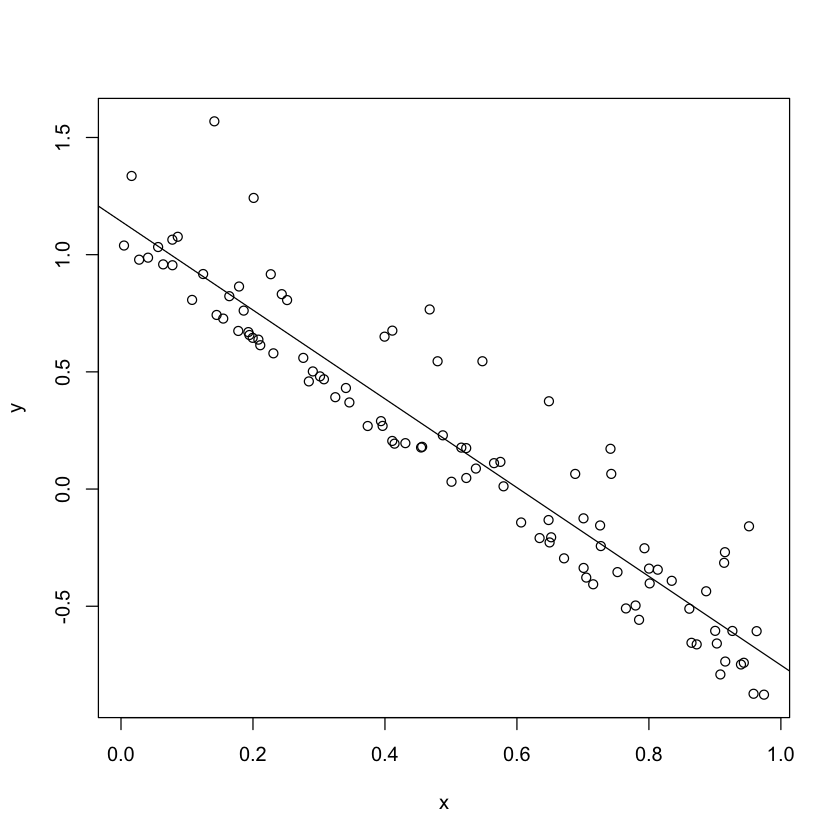

In [23]:
plot(x, y)
abline(lsfit(x, y))

In [29]:
cat("协方差：", cov(x, y), "\t相关系数：", cor(x, y))

协方差： -0.1616441 	相关系数： -0.9453117